In [1]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look cleaner
sns.set()

In [3]:
# Load Dataset
df = pd.read_csv("covid19_global_statistics_2026.csv")
# Display first 5 rows. If you want to display all rows, use df.head(-1)
df.head(-1)

,continent,country,population,date,new_cases,active_cases,cases_per_million,total_cases,new_deaths,deaths_per_million,total_deaths,tests_per_million,total_tests
0,Africa,Eritrea,3662244.0,2026-02-16,NaN,0.0,2782.0,10189,NaN,28.0,103.0,6470.0,23693.0
1,Africa,Niger,26083660.0,2026-02-16,NaN,729.0,381.0,9931,NaN,12.0,312.0,9759.0,254538.0
2,Africa,Saint-Helena,6115.0,2026-02-16,NaN,2164.0,354211.0,2166,NaN,NaN,NaN,NaN,NaN
3,South-America,Falkland-Islands,3539.0,2026-02-16,NaN,0.0,545352.0,1930,NaN,NaN,NaN,2439107.0,8632.0
4,North-America,Montserrat,4965.0,2026-02-16,NaN,19.0,282578.0,1403,NaN,1611.0,8.0,3577442.0,17762.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,Europe,Italy,60262770.0,2026-02-16,NaN,165544.0,443445.0,26723249,NaN,3261.0,196487.0,4665010.0,281126449.0
233,Europe,UK,68497907.0,2026-02-16,NaN,0.0,363666.0,24910387,NaN,3389.0,232112.0,7628357.0,522526476.0
234,Europe,Russia,145805947.0,2026-02-16,NaN,175641.0,165454.0,24124215,NaN,2762.0,402756.0,1875095.0,273400000.0
235,Asia,Turkey,85561976.0,2026-02-16,NaN,NaN,201399.0,17232066,NaN,1194.0,102174.0,1902052.0,162743369.0


In [7]:
# Check all values
print(df.isna())

     continent  country  population   date  new_cases  active_cases  \
0        False    False       False  False       True         False   
1        False    False       False  False       True         False   
2        False    False       False  False       True         False   
3        False    False       False  False       True         False   
4        False    False       False  False       True         False   
..         ...      ...         ...    ...        ...           ...   
233      False    False       False  False       True         False   
234      False    False       False  False       True         False   
235      False    False       False  False       True          True   
236      False    False       False  False       True         False   
237      False    False       False  False       True         False   

     cases_per_million  total_cases  new_deaths  deaths_per_million  \
0                False        False        True               False   
1    

In [8]:
print(df.isna().sum())

continent               2
country                 0
population              9
date                    0
new_cases             221
active_cases           47
cases_per_million       8
total_cases             0
new_deaths            235
deaths_per_million     13
total_deaths            5
tests_per_million      25
total_tests            25
dtype: int64


In [9]:
# checking duplicate rows
df.duplicated()[df.duplicated()==True]

Series([], dtype: bool)

In [22]:
# finding number of rows and columns

print("Shape (rows, columns): ", df.shape,"\n")

print("number of rows: ", df.shape[0])
print("number of columns: ", df.shape[1])

Shape (rows, columns):  (238, 15) 

number of rows:  238
number of columns:  15


In [11]:
# viewing the data types of columns
df.dtypes

continent              object
country                object
population            float64
date                   object
new_cases             float64
active_cases          float64
cases_per_million     float64
total_cases             int64
new_deaths            float64
deaths_per_million    float64
total_deaths          float64
tests_per_million     float64
total_tests           float64
dtype: object

In [23]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['continent'] = df['continent'].replace(r'[\$,]', '', regex=True)
df['cases_per_million'] = pd.to_numeric(df['cases_per_million'])

df.dtypes

continent                     object
country                       object
population                   float64
date                  datetime64[ns]
new_cases                    float64
active_cases                 float64
cases_per_million            float64
total_cases                    int64
new_deaths                   float64
deaths_per_million           float64
total_deaths                 float64
tests_per_million            float64
total_tests                  float64
Date                  datetime64[ns]
sate                  datetime64[ns]
dtype: object

In [24]:
# Statistical summary
df.describe(include='all')

,continent,country,population,date,new_cases,active_cases,cases_per_million,total_cases,new_deaths,deaths_per_million,total_deaths,tests_per_million,total_tests,Date,sate
count,236,238,2.290000e+02,238,17.000000,1.910000e+02,230.000000,2.380000e+02,3.000000,225.000000,2.330000e+02,2.130000e+02,2.130000e+02,238,238
unique,7,238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Africa,Eritrea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,59,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,3.469404e+07,2026-02-16 00:00:00,103.058824,2.636781e+05,202460.960870,8.883449e+06,3.333333,1275.668444,9.026621e+04,2.155978e+06,3.298829e+07,2026-02-16 00:00:00,2026-02-16 00:00:00
min,NaN,NaN,7.990000e+02,2026-02-16 00:00:00,0.000000,0.000000e+00,16.000000,9.000000e+00,0.000000,2.000000,1.000000e+00,5.093000e+03,7.850000e+03,2026-02-16 00:00:00,2026-02-16 00:00:00
25%,NaN,NaN,4.454310e+05,2026-02-16 00:00:00,10.000000,4.550000e+01,19423.250000,2.741875e+04,1.000000,176.000000,2.250000e+02,1.981990e+05,3.478150e+05,2026-02-16 00:00:00,2026-02-16 00:00:00
50%,NaN,NaN,5.797805e+06,2026-02-16 00:00:00,13.000000,6.620000e+02,128762.000000,2.320425e+05,2.000000,869.000000,2.570000e+03,8.851190e+05,2.226216e+06,2026-02-16 00:00:00,2026-02-16 00:00:00
75%,NaN,NaN,2.210284e+07,2026-02-16 00:00:00,63.000000,8.017500e+03,331302.750000,1.565481e+06,5.000000,2092.000000,1.805700e+04,2.439107e+06,1.346373e+07,2026-02-16 00:00:00,2026-02-16 00:00:00
max,NaN,NaN,1.448471e+09,2026-02-16 00:00:00,702.000000,2.212340e+07,771655.000000,7.047539e+08,8.000000,6595.000000,7.010681e+06,2.330212e+07,1.186852e+09,2026-02-16 00:00:00,2026-02-16 00:00:00


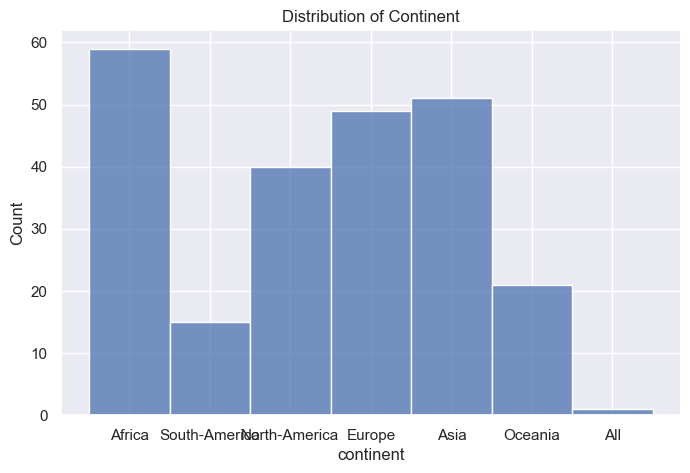

In [25]:
plt.figure(figsize=(8,5))
sns.histplot(df['continent'])
plt.title("Distribution of Continent")
plt.show()

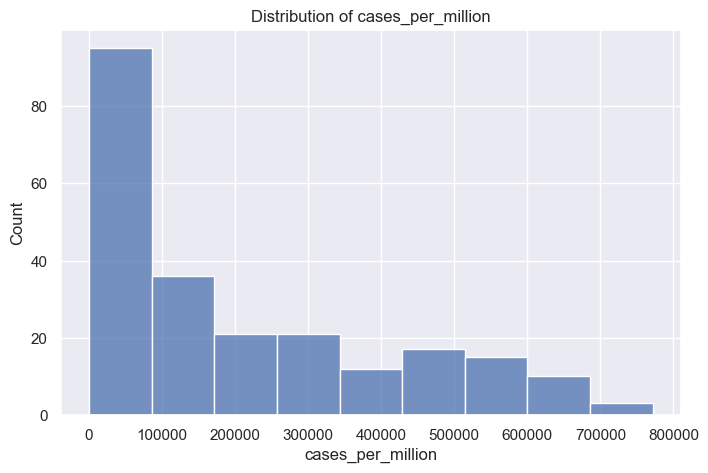

In [26]:
plt.figure(figsize=(8,5))
sns.histplot(df['cases_per_million'])
plt.title("Distribution of cases_per_million")
plt.show()

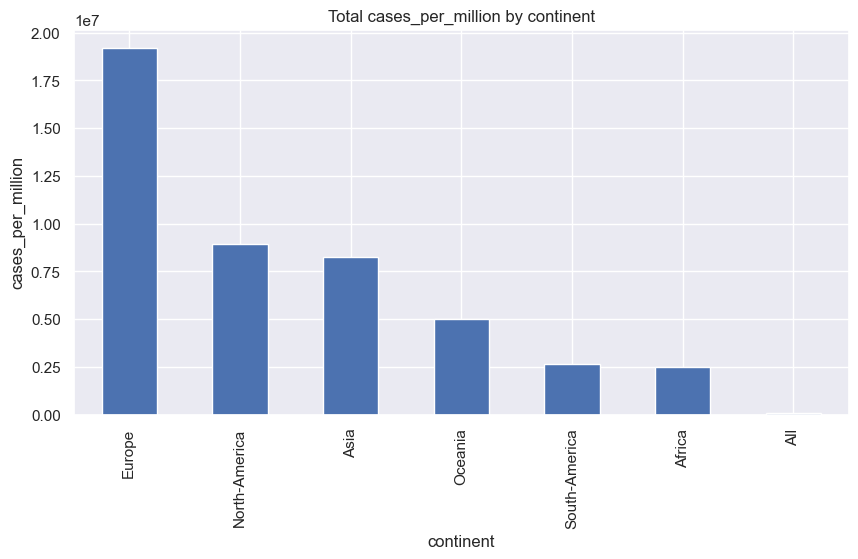

continent
Europe           19199750.0
North-America     8910092.0
Asia              8231501.0
Oceania           5003228.0
South-America     2620425.0
Africa            2510612.0
All                 90413.0
Name: cases_per_million, dtype: float64

In [27]:
country_revenue = df.groupby('continent')['cases_per_million'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
country_revenue.plot(kind='bar')
plt.title("Total cases_per_million by continent")
plt.ylabel("cases_per_million")
plt.show()

country_revenue

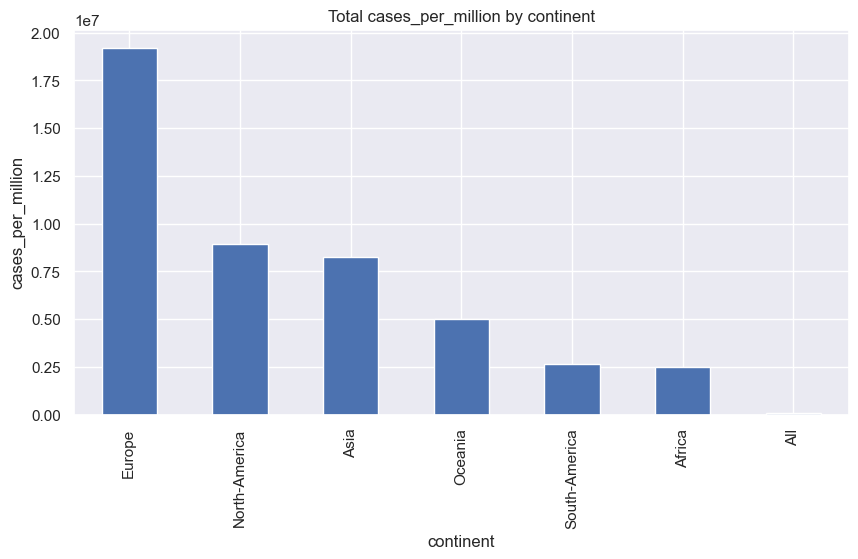

continent
Europe           19199750.0
North-America     8910092.0
Asia              8231501.0
Oceania           5003228.0
South-America     2620425.0
Africa            2510612.0
All                 90413.0
Name: cases_per_million, dtype: float64

In [28]:
product_revenue = df.groupby('continent')['cases_per_million'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
product_revenue.plot(kind='bar')
plt.title("Total cases_per_million by continent")
plt.ylabel("cases_per_million")
plt.show()

product_revenue

In [29]:
salesperson_revenue = df.groupby('country')['cases_per_million'].sum().sort_values(ascending=False)

salesperson_revenue.head(10)

country
Brunei            771655.0
San-Marino        768226.0
Faeroe-Islands    703959.0
S-Korea           673523.0
Austria           670727.0
Niue              652898.0
Slovenia          652803.0
Andorra           619844.0
Martinique        615777.0
France            612013.0
Name: cases_per_million, dtype: float64

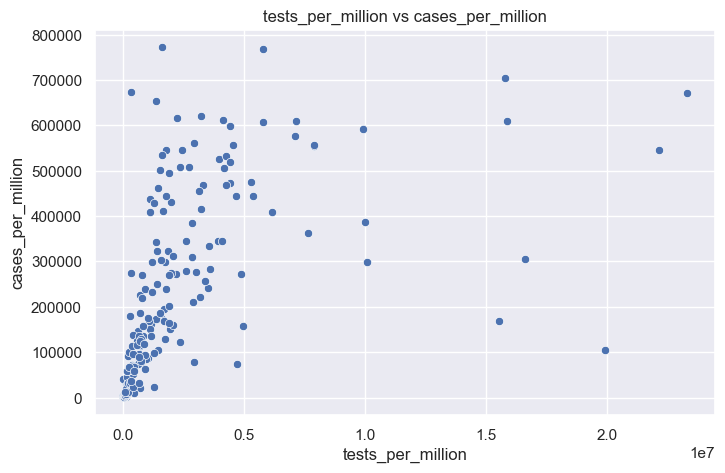

In [30]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='tests_per_million', y='cases_per_million', data=df)
plt.title("tests_per_million vs cases_per_million")
plt.show()

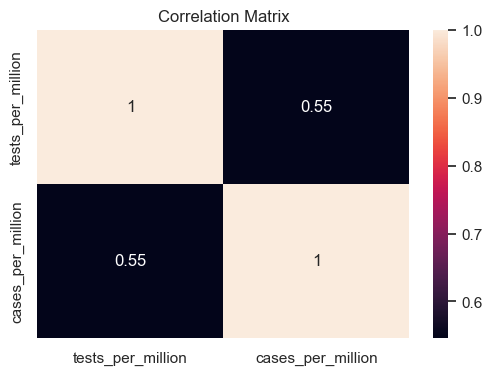

In [31]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['tests_per_million', 'cases_per_million']].corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()